In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

download weather data from here: https://drive.google.com/file/d/1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1/view

In [13]:
data = pd.read_csv('Weather.csv')

/Users/sahibachopra/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data = data.fillna(0)

In [15]:
yVar = data['MaxTemp'].values.reshape(-1,1)
xVar = data['MinTemp'].values.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2, random_state=0)

In [20]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.943e+06
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:21:47   Log-Likelihood:            -3.0799e+05
No. Observations:               95232   AIC:                         6.160e+05
Df Residuals:                   95231   BIC:                         6.160e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4117      0.001   1393.976      0.000       1.410       1.414
==============================================================================
Omnibus:                    12669.825   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27797.262
Skew:                           0.804   Prob(JB):                         0.00
Kurtosis:                       5.103   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
predictions

array([ 35.29260329,  29.80264278,  24.31268226, ...,  33.72404315,
        30.58692286,  32.155483  ])

In [22]:
y_test

array([[ 28.88888889],
       [ 31.11111111],
       [ 27.22222222],
       ..., 
       [ 31.11111111],
       [ 31.11111111],
       [ 36.66666667]])

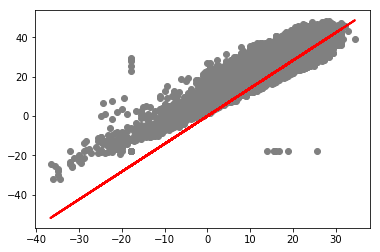

In [25]:
plt.scatter([X_test], [y_test],  color='gray')
plt.plot(X_test, predictions, color='red', linewidth=2)
plt.show()